# Desafío 3- Grupo 8

# El Problema de la Asistencia a la Entrevista

El dataset pertenece al proceso de reclutamiento de varias industrias de la India

Nuestro objetivo es tratar de clasificar, dadas las características del dataset, si una persona irá a la entrevista de trabajo o no.

El Dataset contiene datos acerca de la industria, la ubicación, la posición a buscar, el sexo del candidato, donde vive actualmente el candidato, en que ciudad se ubicará el trabajo y de donde es originariamente el candidato. Además, los recruiters formularon preguntas cuya intención es obtener una respuesta Sí/No

##### Importamos las librerías necesarias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import linear_model

In [5]:
df = pd.read_csv('Interview.csv')
df.head()

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,...,NaN,NaN,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 4,Male,Chennai,...,Yes,Yes,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 5,Male,Chennai,...,Yes,Yes,Uncertain,No,Married,NaN,NaN,NaN,NaN,NaN


#### Vamos a borrar el índice 1233 que no contiene datos

In [6]:
df.drop(df.index[[1233]], inplace = True)

In [7]:
df.columns

Index(['Date of Interview', 'Client name', 'Industry', 'Location',
       'Position to be closed', 'Nature of Skillset', 'Interview Type',
       'Name(Cand ID)', 'Gender', 'Candidate Current Location',
       'Candidate Job Location', 'Interview Venue',
       'Candidate Native location',
       'Have you obtained the necessary permission to start at the required time',
       'Hope there will be no unscheduled meetings',
       'Can I Call you three hours before the interview and follow up on your attendance for the interview',
       'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much',
       'Have you taken a printout of your updated resume. Have you read the JD and understood the same',
       'Are you clear with the venue details and the landmark.',
       'Has the call letter been shared', 'Expected Attendance',
       'Observed Attendance', 'Marital Status', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unname

#### Dropeamos las columnas date of interview y Name(Cand ID) y columnas que no contienen datos

In [8]:
df.drop(['Date of Interview','Name(Cand ID)','Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26','Unnamed: 27','Expected Attendance'], axis=1, inplace=True)

#### Ponemos los datos en minúscula para poder codificar

In [9]:
columns_to_lower = df.columns
for column in columns_to_lower:
    df[column] = df[column].astype(str).str.lower()

In [10]:
df.describe()

,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Gender,Candidate Current Location,Candidate Job Location,Interview Venue,Candidate Native location,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Observed Attendance,Marital Status
count,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233
unique,15,7,9,7,82,6,2,8,7,7,46,6,6,5,5,6,5,9,4,2
top,standard chartered bank,bfsi,chennai,routine,java/j2ee/struts/hibernate,scheduled walk in,male,chennai,chennai,chennai,chennai,yes,yes,yes,yes,yes,yes,yes,yes,single
freq,904,949,841,1023,220,456,965,841,893,852,595,921,954,955,937,942,948,934,782,767


#### Estudiamos el campo Skills

In [11]:
skills = list(set(df["Nature of Skillset"]))
skills = [re.split(", |,|/ |/", i) for i in skills]
skills = [skill for line in skills for skill in line]
skills = sorted(list(set(skills)))
skills

['- sapbo',
 '10.00 am',
 '11.30 am',
 '12.30 pm',
 '9.00 am',
 '9.30 am',
 'accounting operations',
 'als testing',
 'aml',
 'analytical r & d',
 'analytical r&d',
 'automation testing java',
 'banking operations',
 'basesas program',
 'biosimilars',
 'biosimiliars',
 'biosimillar',
 'cdd',
 'cdd kyc',
 'core java',
 'cots',
 'cots developer',
 'dot net',
 'emea',
 'etl',
 'fresher',
 'generic drugs – ra',
 'global labelling',
 'hadoop',
 'hibernate',
 'informatica',
 'j2ee',
 'java',
 'java ',
 'java developer',
 'java j2ee',
 'java jsf',
 'java tech lead',
 'java-sas',
 'jsf',
 'kyc',
 'l & l',
 'lcm -manager',
 'lending & liability',
 'lending and liabilities',
 'lending&liablities',
 'licensing – ra',
 'manager',
 'ms exchange)',
 'oracle',
 'oracle plsql',
 'product control',
 'production',
 'production support - sccm',
 'publishing',
 'ra label',
 'ra publishing',
 'regulatory',
 'reporting',
 'routine',
 'sas',
 'sccm',
 'sccm – sharepoint',
 'sccm – sql',
 'sccm- desktop suppo

In [12]:
invalid_skills = ['10.00 am','11.30 am','12.30 pm','9.00 am','9.30 am']
df = df.loc[[ skill not in invalid_skills for skill in df["Nature of Skillset"]]]

In [13]:
df["Nature of Skillset"].value_counts().sort_index()

- sapbo, informatica                       4
accounting operations                     86
als testing                               15
aml/kyc/cdd                               84
analytical r & d                          13
analytical r&d                             3
automation testing java                    7
banking operations                        24
basesas program/ reporting                 1
biosimilars                                1
biosimiliars                               6
biosimillar                                3
cdd kyc                                   52
core java                                 17
cots                                       4
cots developer                            13
dot net                                    9
emea                                       6
etl                                        9
fresher                                   86
generic drugs – ra                         4
global labelling                           6
hadoop    

#### Vamos a empezar a limpiar la base de datos. Para eso reemplazamos en esta primer parte algunas de las respuestas que dijeron los participantes de las entrevistas para tomarlas como booleanos

In [14]:
df["Can I Call you three hours before the interview and follow up on your attendance for the interview"] = df["Can I Call you three hours before the interview and follow up on your attendance for the interview"].replace(["No Dont","Na"],["no",np.nan])
df["Have you taken a printout of your updated resume. Have you read the JD and understood the same"] = df["Have you taken a printout of your updated resume. Have you read the JD and understood the same"].replace(["No- will take it soon","Not yet","Not yet","Na","na"],["no","no","no",np.nan,np.nan])
df["Can I have an alternative number/ desk number. I assure you that I will not trouble you too much"] = df["Can I have an alternative number/ desk number. I assure you that I will not trouble you too much"].replace(["No I have only thi number","na","Na"],["no",np.nan,np.nan])
df["Are you clear with the venue details and the landmark."] = df["Are you clear with the venue details and the landmark."].replace(["No- I need to check","na","Na"],["no",np.nan,np.nan])
df["Has the call letter been shared"] = df["Has the call letter been shared"].replace(["Havent Checked", "need to check","Not sure","yet to check","na","Na"],["unsure","unsure","unsure","unsure",np.nan,np.nan])
df["Hope there will be no unscheduled meetings"] = df["Hope there will be no unscheduled meetings"].replace(["na","cant say"],[np.nan,"unsure"])
df["Have you obtained the necessary permission to start at the required time"] = df["Have you obtained the necessary permission to start at the required time"].replace(['Not yet', 'yet to confirm',"na"],["no","no",np.nan])
df = df.replace(['nan'],[np.nan])

#### Utilizamos un diccionario para corregir algunos campos particulares que presentaban problemas de repetición, codificación, etc.

In [15]:
col_names =  ['lookup_regex', 'extract_regex', 'column_to_lookup','column_to_complete','value_type','value_offset','extra_condition']
diccionario  = pd.DataFrame(columns = col_names)
diccionario.loc[len(diccionario)] = ['lending & liability|lending and liabilities|lending&liablities', '', 'Nature of Skillset', 'Nature of Skillset', 'string','l & l', {'data_column' : 'Nature of Skillset', 'value' : ['lending & liability','lending and liabilities','lending&liablities'], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['tech lead- mednet|tech lead-mednet', '', 'Nature of Skillset', 'Nature of Skillset', 'string','tech lead/mednet', {'data_column' : 'Nature of Skillset', 'value' : ['tech lead- mednet','tech lead-mednet'], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['biosimilars|biosimiliars', '', 'Nature of Skillset', 'Nature of Skillset', 'string','biosimillar', {'data_column' : 'Nature of Skillset', 'value' : ['biosimilars','biosimiliars'], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['java j2ee|j2ee|java ,j2ee', '', 'Nature of Skillset', 'Nature of Skillset', 'string','java/j2ee', {'data_column' : 'Nature of Skillset', 'value' : ['java j2ee','j2ee','java ,j2ee'], 'condition_func': (lambda x,y: x.isin(y))}]
#diccionario.loc[len(diccionario)] = ['sccm- networking|sccm-\(network', '', 'Nature of Skillset', 'Nature of Skillset', 'string','sccm/networking', {'data_column' : 'Nature of Skillset', 'value' : ['sccm- networking', 'sccm-(network'], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['java developer', '', 'Nature of Skillset', 'Nature of Skillset', 'string','java/developer', {'data_column' : 'Nature of Skillset', 'value' : ['java developer'], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['java jsf', '', 'Nature of Skillset', 'Nature of Skillset', 'string','java/jsf', {'data_column' : 'Nature of Skillset', 'value' : ['java jsf'], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['java tech lead', '', 'Nature of Skillset', 'Nature of Skillset', 'string','java/tech lead', {'data_column' : 'Nature of Skillset', 'value' : ['java tech lead'], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['core java', '', 'Nature of Skillset', 'Nature of Skillset', 'string','java', {'data_column' : 'Nature of Skillset', 'value' : ['core java'], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['analytical r & d', '', 'Nature of Skillset', 'Nature of Skillset', 'string','analytical r&d', {'data_column' : 'Nature of Skillset', 'value' : ['analytical r & d'], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['automation testing java', '', 'Nature of Skillset', 'Nature of Skillset', 'string','automation testing/java', {'data_column' : 'Nature of Skillset', 'value' : ['automation testing java'], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['cots developer', '', 'Nature of Skillset', 'Nature of Skillset', 'string','cots/developer', {'data_column' : 'Nature of Skillset', 'value' : ['cots developer'], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['ra label', '', 'Nature of Skillset', 'Nature of Skillset', 'string','ra/label', {'data_column' : 'Nature of Skillset', 'value' : ['ra label'], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['ra publishing', '', 'Nature of Skillset', 'Nature of Skillset', 'string','ra/publishing', {'data_column' : 'Nature of Skillset', 'value' : ['ra publishing'], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['sccm-\(network, sharepoint,ms exchange\)', '', 'Nature of Skillset', 'Nature of Skillset', 'string','sccm-network, sharepoint,ms exchange', {'data_column' : 'Nature of Skillset', 'value' : ['sccm-(network, sharepoint,ms exchange)'], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['tl|technical lead', '', 'Nature of Skillset', 'Nature of Skillset', 'string','tech lead', {'data_column' : 'Nature of Skillset', 'value' : ['tl','technical lead'], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['it products and services|it services', '', 'Industry', 'Industry', 'string','it', {'data_column' : 'Industry', 'value' : ['it products and services','it services'], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['standard chartered bank chennai', '', 'Client name', 'Client name', 'string','standard chartered bank', {'data_column' : 'Client name', 'value' : ['standard chartered bank chennai'], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['hewitt|aon hewitt gurgaon', '', 'Client name', 'Client name', 'string','aon hewitt', {'data_column' : 'Client name', 'value' : ['hewitt','aon hewitt gurgaon'], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['scheduled walk in|sceduled walkin', '', 'Interview Type', 'Interview Type', 'string','scheduled walkin', {'data_column' : 'Interview Type', 'value' : ['scheduled walk in','sceduled walkin'], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['walkin ', '', 'Interview Type', 'Interview Type', 'string','walkin', {'data_column' : 'Interview Type', 'value' : ['walkin'], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['t-24 developer', '', 'Nature of Skillset', 'Nature of Skillset', 'string','t 24/developer', {'data_column' : 'Nature of Skillset', 'value' : ['t-24 developer'], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['chennai ', '', 'Location', 'Location', 'string','chennai', {'data_column' : 'Location', 'value' : ['chennai '], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['- cochin- ', '', 'Location', 'Location', 'string','cochin', {'data_column' : 'Location', 'value' : ['- cochin- '], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['gurgaonr', '', 'Location', 'Location', 'string','gurgaon', {'data_column' : 'Location', 'value' : ['gurgaonr'], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['chennai ', '', 'Candidate Current Location', 'Candidate Current Location', 'string','chennai', {'data_column' : 'Candidate Current Location', 'value' : ['chennai '], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['- cochin- ', '', 'Candidate Current Location', 'Candidate Current Location', 'string','cochin', {'data_column' : 'Candidate Current Location', 'value' : ['- cochin- '], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['gurgaonr', '', 'Candidate Current Location', 'Candidate Current Location', 'string','gurgaon', {'data_column' : 'Candidate Current Location', 'value' : ['gurgaonr'], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['chennai ', '', 'Interview Venue', 'Interview Venue', 'string','chennai', {'data_column' : 'Interview Venue', 'value' : ['chennai '], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['- cochin- ', '', 'Interview Venue', 'Interview Venue', 'string','cochin', {'data_column' : 'Interview Venue', 'value' : ['- cochin- '], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['gurgaonr', '', 'Interview Venue', 'Interview Venue', 'string','gurgaon', {'data_column' : 'Interview Venue', 'value' : ['gurgaonr'], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['chennai ', '', 'Candidate Job Location', 'Candidate Job Location', 'string','chennai', {'data_column' : 'Candidate Job Location', 'value' : ['chennai '], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['- cochin- ', '', 'Candidate Job Location', 'Candidate Job Location', 'string','cochin', {'data_column' : 'Candidate Job Location', 'value' : ['- cochin- '], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['gurgaonr', '', 'Candidate Job Location', 'Candidate Job Location', 'string','gurgaon', {'data_column' : 'Candidate Job Location', 'value' : ['gurgaonr'], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['chennai ', '', 'Candidate Native location', 'Candidate Native location', 'string','chennai', {'data_column' : 'Candidate Native location', 'value' : ['chennai '], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['- cochin- ', '', 'Candidate Native location', 'Candidate Native location', 'string','cochin', {'data_column' : 'Candidate Native location', 'value' : ['- cochin- '], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['gurgaonr', '', 'Candidate Native location', 'Candidate Native location', 'string','gurgaon', {'data_column' : 'Candidate Native location', 'value' : ['gurgaonr'], 'condition_func': (lambda x,y: x.isin(y))}]
diccionario.loc[len(diccionario)] = ['delhi /ncr', '', 'Candidate Native location', 'Candidate Native location', 'string','delhi', {'data_column' : 'Candidate Native location', 'value' : ['delhi /ncr'], 'condition_func': (lambda x,y: x.isin(y))}]

In [16]:
def parse(string,pattern):
    matches = re.search(pattern["lookup_regex"], string)
    parse_data = None
    if matches != None:
        if (pattern["value_type"] == 'float') and (pattern["extract_regex"] != ''):
            parse_data = float( re.search(pattern["extract_regex"], matches.group(0)).group(0).replace(".","") ) + float(pattern["value_offset"])
        elif (pattern["value_type"] == 'int') and (pattern["extract_regex"] != ''):
            parse_data = int( re.search(pattern["extract_regex"], matches.group(0)).group(0).replace(".","") ) + int(pattern["value_offset"])
        elif (pattern["value_type"] == 'string') and (pattern["extract_regex"] != ''):
            parse_data = re.search(pattern["extract_regex"], matches.group(0)).group(0) + pattern["value_offset"]
        elif pattern["value_type"] == 'float':
            parse_data = float(pattern["value_offset"])
        elif pattern["value_type"] == 'int':
            parse_data = int(pattern["value_offset"])
        else:
            parse_data = pattern["value_offset"]
    else:
        parse_data = np.nan;
    return parse_data

def df_parser(data,parse_dictionary):
    for pattern_row_index, pattern in parse_dictionary.iterrows():
        #rows_to_parse = (data[pattern["column_to_complete"]].isnull() == True) & (pattern['extra_condition']['condition_func'] (data[pattern['extra_condition']['data_column']],pattern['extra_condition']['value']) == True) 
        rows_to_parse = pattern['extra_condition']['condition_func'] (data[pattern['extra_condition']['data_column']],pattern['extra_condition']['value']) == True 
        info_to_parse = data[rows_to_parse][pattern["column_to_lookup"]]
        valid_info = info_to_parse[info_to_parse.apply(lambda a : (type(a) is str) and (a != ''))]
        data.loc[rows_to_parse, pattern["column_to_complete"]] = valid_info.apply(parse, args=([pattern]))

In [17]:
df_parser(df,diccionario)

In [18]:
df['Nature of Skillset'].value_counts().sort_index()

- sapbo, informatica                     4
accounting operations                   86
als testing                             15
aml/kyc/cdd                             84
analytical r&d                          16
automation testing/java                  7
banking operations                      24
basesas program/ reporting               1
biosimillar                             10
cdd kyc                                 52
cots                                     4
cots/developer                          13
dot net                                  9
emea                                     6
etl                                      9
fresher                                 86
generic drugs – ra                       4
global labelling                         6
hadoop                                  12
java                                    38
java                                    10
java, j2ee                               2
java, spring, hibernate                  2
java, sql  

#### Definimos una columna que cuenta la cantidad de skills de cada candidato

In [19]:
df['n_skills'] = df['Nature of Skillset'].apply(len)

In [20]:
set(df["Candidate Current Location"])

{'bangalore', 'chennai', 'cochin', 'delhi', 'gurgaon', 'hyderabad', 'noida'}

In [21]:
df["Industry"].value_counts()

bfsi               942
pharmaceuticals    165
it                  79
electronics         23
telecom             17
Name: Industry, dtype: int64

In [22]:
df["Client name"].value_counts()

standard chartered bank    914
hospira                     75
pfizer                      75
aon hewitt                  50
flextronics                 23
anz                         22
ust                         18
prodapt                     17
astrazeneca                 15
williams lea                11
barclays                     5
woori bank                   1
Name: Client name, dtype: int64

In [23]:
df["Have you obtained the necessary permission to start at the required time"].value_counts()

yes        917
no          84
not yet     19
Name: Have you obtained the necessary permission to start at the required time, dtype: int64

In [24]:
relevant_cols = ["Position to be closed"]
df = df.dropna(subset=relevant_cols)

In [25]:
df["Position to be closed"].value_counts()

routine                1016
niche                   163
dot net                  18
trade finance            11
aml                       8
production- sterile       5
selenium testing          5
Name: Position to be closed, dtype: int64

In [26]:
df["Interview Type"].unique()

array(['scheduled walkin', 'scheduled ', nan, 'walkin '], dtype=object)

In [27]:
print(set(df["Candidate Current Location"]))
print(set(df["Interview Venue"]))
print(set(df["Candidate Job Location"]))
print(set(df["Candidate Native location"]))

{'bangalore', 'delhi', 'hyderabad', 'cochin', 'gurgaon', 'noida', 'chennai'}
{'bangalore', 'hyderabad', 'cochin', 'gurgaon', 'noida', 'hosur', 'chennai'}
{'bangalore', 'visakapatinam', 'cochin', 'gurgaon', 'noida', 'hosur', 'chennai'}
{'belgaum', 'vijayawada', 'ghaziabad', 'visakapatinam', 'vellore', 'kolkata', 'hosur', 'mysore', 'pune', 'panjim', 'chennai', 'chandigarh', 'ahmedabad', 'allahabad', 'cuttack', 'nagercoil', 'hissar', 'noida', 'bangalore', 'trivandrum', 'bhubaneshwar', 'coimbatore', 'hyderabad', 'salem', 'tuticorin', 'cochin', 'gurgaon', 'ambur', 'mumbai', 'kanpur', 'lucknow', 'trichy', 'tanjore', 'warangal', 'patna', 'agra', 'tirupati', 'kurnool', 'delhi', 'faizabad', 'pondicherry', 'chitoor', 'anantapur', 'baddi'}


In [28]:
df["match_interview"] = df["Candidate Current Location"] == df["Interview Venue"]
df["match_job"] = df["Candidate Current Location"] == df["Candidate Job Location"]
df["match_nacim"] = df["Candidate Job Location"] == df["Candidate Native location"]

## One Hot Encoding

In [29]:
onehot_skills = df["Nature of Skillset"].str.split(" , | ,|, |,| /|/ |/| - | -|- |-| – ", expand=True).stack().str.get_dummies().sum(level=0)
onehot_skills

,accounting operations,als testing,aml,analytical r&d,automation testing,banking operations,basesas program,biosimillar,cdd,cdd kyc,...,sharepoint,spring,sql,sr automation testing,struts,submission management,t 24,tech lead,testing,xml
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
onehot_skills.describe()

,accounting operations,als testing,aml,analytical r&d,automation testing,banking operations,basesas program,biosimillar,cdd,cdd kyc,...,sharepoint,spring,sql,sr automation testing,struts,submission management,t 24,tech lead,testing,xml
count,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,...,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000
mean,0.070147,0.012235,0.068515,0.013051,0.005710,0.019576,0.000816,0.008157,0.068515,0.042414,...,0.001631,0.038336,0.009788,0.010604,0.181892,0.001631,0.012235,0.015498,0.008972,0.002447
std,0.255499,0.109978,0.252732,0.113538,0.075377,0.138594,0.028560,0.089982,0.252732,0.201615,...,0.040373,0.192085,0.098489,0.102468,0.385913,0.040373,0.109978,0.123571,0.094335,0.049427
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df.drop(["Nature of Skillset"], axis=1, inplace=True)
df = pd.concat([df, onehot_skills], axis=1, sort=False)

In [33]:
onehot_client = pd.get_dummies(df["Client name"],prefix="cli")
df.drop(["Client name"], axis=1, inplace=True)
df = pd.concat([df, onehot_client], axis=1, sort=False)

In [34]:
onehot_industry = pd.get_dummies(df["Industry"],prefix="ind")
df.drop(["Industry"], axis=1, inplace=True)
df = pd.concat([df, onehot_industry], axis=1, sort=False)

In [35]:
onehot_gender = pd.get_dummies(df["Gender"])
df.drop(["Gender"], axis=1, inplace=True)
df = pd.concat([df, onehot_gender], axis=1, sort=False)

In [36]:
onehot_position = pd.get_dummies(df["Position to be closed"],prefix="pos")
df.drop(["Position to be closed"], axis=1, inplace=True)
df = pd.concat([df, onehot_position], axis=1, sort=False)

In [37]:
onehot_location = pd.get_dummies(df["Location"],prefix="loc")
df.drop(["Location"], axis=1, inplace=True)
df = pd.concat([df, onehot_location], axis=1, sort=False)

In [38]:
onehot_interview_type = pd.get_dummies(df["Interview Type"],prefix="typ")
df.drop(["Interview Type"], axis=1, inplace=True)
df = pd.concat([df, onehot_interview_type], axis=1, sort=False)

In [39]:
onehot_question_a = pd.get_dummies(df["Have you obtained the necessary permission to start at the required time"],prefix="qa")
df.drop(["Have you obtained the necessary permission to start at the required time"], axis=1, inplace=True)
df = pd.concat([df, onehot_question_a], axis=1, sort=False)

In [40]:
onehot_question_b = pd.get_dummies(df["Hope there will be no unscheduled meetings"],prefix="qb")
df.drop(["Hope there will be no unscheduled meetings"], axis=1, inplace=True)
df = pd.concat([df, onehot_question_b], axis=1, sort=False)

In [41]:
onehot_question_c = pd.get_dummies(df["Can I Call you three hours before the interview and follow up on your attendance for the interview"],prefix="qc")
df.drop(["Can I Call you three hours before the interview and follow up on your attendance for the interview"], axis=1, inplace=True)
df = pd.concat([df, onehot_question_c], axis=1, sort=False)

In [42]:
onehot_question_d = pd.get_dummies(df["Can I have an alternative number/ desk number. I assure you that I will not trouble you too much"],prefix="qd")
df.drop(["Can I have an alternative number/ desk number. I assure you that I will not trouble you too much"], axis=1, inplace=True)
df = pd.concat([df, onehot_question_d], axis=1, sort=False)

In [43]:
onehot_question_e = pd.get_dummies(df["Have you taken a printout of your updated resume. Have you read the JD and understood the same"],prefix="qe")
df.drop(["Have you taken a printout of your updated resume. Have you read the JD and understood the same"], axis=1, inplace=True)
df = pd.concat([df, onehot_question_e], axis=1, sort=False)

In [44]:
onehot_question_f = pd.get_dummies(df["Are you clear with the venue details and the landmark."],prefix="qf")
df.drop(["Are you clear with the venue details and the landmark."], axis=1, inplace=True)
df = pd.concat([df, onehot_question_f], axis=1, sort=False)

In [45]:
onehot_question_g = pd.get_dummies(df["Has the call letter been shared"],prefix="qg")
df.drop(["Has the call letter been shared"], axis=1, inplace=True)
df = pd.concat([df, onehot_question_g], axis=1, sort=False)

In [46]:
onehot_ccl = pd.get_dummies(df["Candidate Current Location"],prefix="ccl")
df.drop(["Candidate Current Location"], axis=1, inplace=True)
df = pd.concat([df, onehot_ccl], axis=1, sort=False)

In [47]:
onehot_cjl = pd.get_dummies(df["Candidate Job Location"],prefix="cjl")
df.drop(["Candidate Job Location"], axis=1, inplace=True)
df = pd.concat([df, onehot_cjl], axis=1, sort=False)

In [48]:
onehot_iv = pd.get_dummies(df["Interview Venue"],prefix="iv")
df.drop(["Interview Venue"], axis=1, inplace=True)
df = pd.concat([df, onehot_iv], axis=1, sort=False)

In [49]:
onehot_cnl = pd.get_dummies(df["Candidate Native location"],prefix="cnl")
df.drop(["Candidate Native location"], axis=1, inplace=True)
df = pd.concat([df, onehot_cnl], axis=1, sort=False)

In [50]:
onehot_ms = pd.get_dummies(df["Marital Status"],prefix="ms")
df.drop(["Marital Status"], axis=1, inplace=True)
df = pd.concat([df, onehot_ms], axis=1, sort=False)

In [51]:
print(df.columns)

Index(['Observed Attendance', 'n_skills', 'match_interview', 'match_job',
       'match_nacim', 'accounting operations', 'als testing', 'aml',
       'analytical r&d', 'automation testing',
       ...
       'cnl_tirupati', 'cnl_trichy', 'cnl_trivandrum', 'cnl_tuticorin',
       'cnl_vellore', 'cnl_vijayawada', 'cnl_visakapatinam', 'cnl_warangal',
       'ms_married', 'ms_single'],
      dtype='object', length=197)


### Preparando la variable target para clasificar:

In [52]:
set(df['Observed Attendance'])

{'no', 'no ', 'yes', 'yes '}

In [53]:
df['Observed Attendance'] = df['Observed Attendance'].replace(['no', 'no ', 'yes', 'yes '],[0,0,1,1])
df['Observed Attendance'].value_counts()

1    778
0    448
Name: Observed Attendance, dtype: int64

### Preparamos los features para trabajar

In [77]:
df.shape

(1226, 197)

In [60]:
feature_cols = df[['n_skills', 'match_interview', 'match_job',
       'match_nacim', 'accounting operations', 'als testing', 'aml',
       'analytical r&d', 'automation testing','cnl_tirupati','cnl_trichy', 'cnl_trivandrum', 'cnl_tuticorin',
       'cnl_vellore', 'cnl_vijayawada', 'cnl_visakapatinam', 'cnl_warangal',
       'ms_married', 'ms_single']]

In [62]:
X = feature_cols
y = df['Observed Attendance']

Evaluaremos con el modelo de KNN vecinos

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [78]:
X_test.shape

(307, 19)

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, auc, accuracy_score

In [66]:
# Calculamos los scores de cross validation sobre los features estandarizados
from sklearn.model_selection import cross_val_score
scores_para_df_standar = []
for i in range(1,100,5):
    model = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}
    scores_para_df_standar.append(dict_row_score)

In [68]:
df_scores = pd.DataFrame(scores_para_df_standar)
df_scores.head()

,n_neighbours,score_medio,score_std
0,1,0.520141,0.032327
1,6,0.523468,0.041032
2,11,0.594149,0.026155
3,16,0.576752,0.027674
4,21,0.603926,0.021674


In [69]:
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,n_neighbours,score_medio,score_std
12,61,0.630031,0.000808
13,66,0.630031,0.000808
14,71,0.630031,0.000808
15,76,0.630031,0.000808
16,81,0.630031,0.000808
17,86,0.630031,0.000808
18,91,0.630031,0.000808
19,96,0.630031,0.000808


In [70]:
df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']

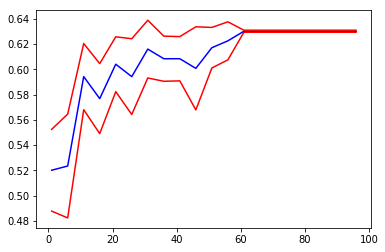

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df_scores['n_neighbours'],df_scores['limite_inferior'],color='r')
plt.plot(df_scores['n_neighbours'],df_scores['score_medio'],color='b')
plt.plot(df_scores['n_neighbours'],df_scores['limite_superior'],color='r');

In [72]:
best_k = df_scores.loc[df_scores.score_medio == df_scores.score_medio.max(),'n_neighbours'].values
best_k = best_k[0]
best_k

61

In [73]:
model = KNeighborsClassifier(n_neighbors=61)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=61, p=2,
           weights='uniform')

In [74]:
# Lo utilizamos para predecir en test
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  0, 108],
       [  2, 197]])

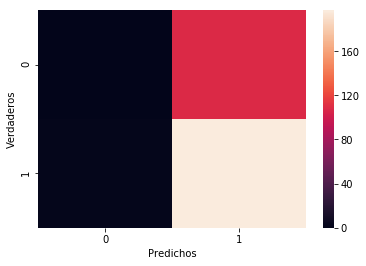

In [76]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

### Probamos el modelo de regresión Logística

In [79]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [80]:
# Vamos a querer graficar los distintos valores del score de cross validation en función del hiperparámetro C
# Para esto generamos una lista de diccionarios que después se puede convertir fácilmente en DataFrame

lg_scores_para_df = []

# Probamos algunos valores de C 

C_lista = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]


for i in C_lista:
    
    # En cada iteración instanciamos el modelo con un hiperparámetro distinto
    model = linear_model.LogisticRegression(C=i)
    
    # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Para cada valor de n_neighbours, creo un diccionario con el valor de n_neighbours y la media y el desvío de los scores.
    dict_row_score = {'score_medio':np.mean(cv_scores), 'score_std':np.std(cv_scores), 'C':i}
    
    # Guardo cada uno en la lista de diccionarios
    lg_scores_para_df.append(dict_row_score)

In [81]:
lg_df_scores = pd.DataFrame(lg_scores_para_df)
lg_df_scores

,C,score_medio,score_std
0,0.0001,0.610466,0.013453
1,0.0010,0.610466,0.013453
2,0.0100,0.614813,0.012111
3,0.1000,0.615906,0.013461
4,1.0000,0.615906,0.013461
5,10.0000,0.615906,0.013461
6,100.0000,0.615906,0.013461
7,1000.0000,0.615906,0.013461
8,10000.0000,0.615906,0.013461


In [82]:
lg = linear_model.LogisticRegression()

lg.fit(X_train, y_train)

#X_test = scaler.fit_transform(X_test)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
lg_df_scores['limite_inferior'] = lg_df_scores['score_medio'] - lg_df_scores['score_std']
lg_df_scores['limite_superior'] = lg_df_scores['score_medio'] + lg_df_scores['score_std']
lg_df_scores.head()

,C,score_medio,score_std,limite_inferior,limite_superior
0,0.0001,0.610466,0.013453,0.597013,0.623918
1,0.0010,0.610466,0.013453,0.597013,0.623918
2,0.0100,0.614813,0.012111,0.602702,0.626925
3,0.1000,0.615906,0.013461,0.602446,0.629367
4,1.0000,0.615906,0.013461,0.602446,0.629367


In [84]:
lg_df_scores.loc[lg_df_scores.score_medio == lg_df_scores.score_medio.max()]

,C,score_medio,score_std,limite_inferior,limite_superior
3,0.1,0.615906,0.013461,0.602446,0.629367
4,1.0,0.615906,0.013461,0.602446,0.629367
5,10.0,0.615906,0.013461,0.602446,0.629367
6,100.0,0.615906,0.013461,0.602446,0.629367
7,1000.0,0.615906,0.013461,0.602446,0.629367
8,10000.0,0.615906,0.013461,0.602446,0.629367


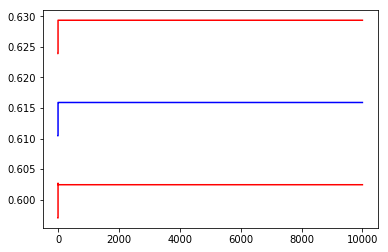

In [85]:
plt.plot(lg_df_scores['C'],lg_df_scores['limite_inferior'],color='r')
plt.plot(lg_df_scores['C'],lg_df_scores['score_medio'],color='b')
plt.plot(lg_df_scores['C'],lg_df_scores['limite_superior'],color='r');

#### Entrenamos de nuevo el modelo con todo el set de entrenamiento utilizando el hiperparámetro óptimo:

In [86]:
lg_modelo_optimizado = linear_model.LogisticRegression(C=1000)

lg_modelo_optimizado.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [87]:
y_pred_lg_test = lg_modelo_optimizado.predict(X_test)

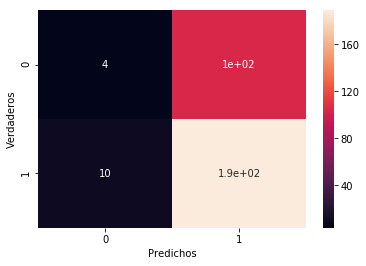

In [88]:
confusion_matrix(y_test, y_pred_lg_test)

sns.heatmap(confusion_matrix(y_test, y_pred_lg_test), annot=True)


plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [89]:
# Calculamos el accuracy

accuracy_score(y_test, y_pred_lg_test)

0.6286644951140065

#### Ajustando los umbrales

In [105]:
lg_modelo_optimizado.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [106]:
lg_modelo_optimizado.predict_proba(X_test)

array([[5.44661278e-01, 4.55338722e-01],
       [3.14030508e-01, 6.85969492e-01],
       [3.31897226e-01, 6.68102774e-01],
       [3.37598586e-01, 6.62401414e-01],
       [3.30026144e-01, 6.69973856e-01],
       [3.90359473e-01, 6.09640527e-01],
       [3.87122831e-01, 6.12877169e-01],
       [3.37598586e-01, 6.62401414e-01],
       [3.30026144e-01, 6.69973856e-01],
       [3.90563081e-01, 6.09436919e-01],
       [3.90359473e-01, 6.09640527e-01],
       [3.90359473e-01, 6.09640527e-01],
       [2.76729323e-01, 7.23270677e-01],
       [3.67114882e-01, 6.32885118e-01],
       [2.60006405e-01, 7.39993595e-01],
       [3.91981441e-01, 6.08018559e-01],
       [3.15499455e-01, 6.84500545e-01],
       [3.82380482e-01, 6.17619518e-01],
       [3.69887678e-01, 6.30112322e-01],
       [3.96861543e-01, 6.03138457e-01],
       [3.65336798e-01, 6.34663202e-01],
       [4.14320398e-01, 5.85679602e-01],
       [3.91981441e-01, 6.08018559e-01],
       [4.39793698e-01, 5.60206302e-01],
       [2.699657

In [107]:
print(np.mean(lg_modelo_optimizado.predict_proba(X_test)[:,1] > 0.5))
print(np.mean(lg_modelo_optimizado.predict(X_test)))

y_pred_orig = lg_modelo_optimizado.predict(X_test)

0.9543973941368078
0.9543973941368078


In [108]:
y_probs_logit = lg_modelo_optimizado.predict_proba(X_test)
y_probs_logit_left = y_probs_logit[:,1]

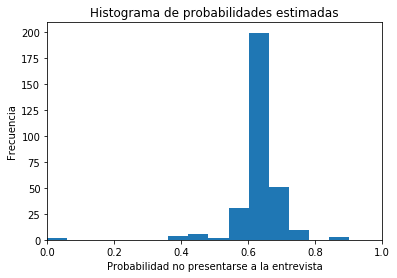

In [109]:
# 15 bins
plt.hist(y_probs_logit_left, bins=15)

# x-axis de 0 a 1
plt.xlim(0,1)
plt.title('Histograma de probabilidades estimadas')
plt.xlabel('Probabilidad no presentarse a la entrevista')
plt.ylabel('Frecuencia')
plt.show()

In [110]:
from sklearn.preprocessing import binarize
y_pred_logit = binarize(y_probs_logit, 0.3)[:,1]

In [111]:
#Veamos la matriz de confusión con las predicciones basadas en el modelo original
confusion_matrix(y_test,y_pred_orig)

array([[  4, 104],
       [ 10, 189]])

In [112]:
#Veamos la matriz de confusión con las predicciones basadas en el modelo modificado
confusion_matrix(y_test,y_pred_logit)

array([[  0, 108],
       [  2, 197]])

In [115]:
print('Recall umbral 0.5=', recall_score(y_test, y_pred_orig))
print('Recall umbral 0.3=', recall_score(y_test, y_pred_logit))

Recall umbral 0.5= 0.949748743718593
Recall umbral 0.3= 0.9899497487437185


## Modelo Naive Bayes

In [91]:
from sklearn.naive_bayes import BernoulliNB

model_BNB = BernoulliNB()
model_BNB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [92]:
labels_predichas = model_BNB.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, labels_predichas)

0.6319218241042345

In [95]:
matBNB = confusion_matrix(y_test, labels_predichas)
matBNB.shape

(2, 2)

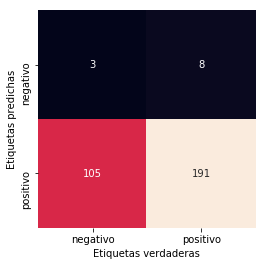

In [96]:
sns.heatmap(matBNB.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['negativo','positivo'], yticklabels=['negativo','positivo'])
plt.xlabel('Etiquetas verdaderas')
plt.ylabel('Etiquetas predichas');

#### Probamos ahora Support Vector Machine

In [97]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [98]:
svc_C = [1, 5, 10, 50]
svc_gamma = [0.0001, 0.0005, 0.001, 0.005]
for c in svc_C:
    for g in svc_gamma:
        model_svc = SVC(kernel='rbf', class_weight='balanced', C=c, gamma = g)
        print (np.mean(cross_val_score(model_svc,X_train,y_train,cv=5)),' gamma:',g,' C:',c)

0.36996911380375386  gamma: 0.0001  C: 1
0.46235447849845573  gamma: 0.0005  C: 1
0.5430803041102399  gamma: 0.001  C: 1
0.49948325017818956  gamma: 0.005  C: 1
0.5267640769779044  gamma: 0.0001  C: 5
0.5397065811356617  gamma: 0.0005  C: 5
0.5060049893086245  gamma: 0.001  C: 5
0.465728201473034  gamma: 0.005  C: 5
0.5289261107151342  gamma: 0.0001  C: 10
0.5060049893086245  gamma: 0.0005  C: 10
0.4875267284390592  gamma: 0.001  C: 10
0.4396353052981706  gamma: 0.005  C: 10
0.5060049893086245  gamma: 0.0001  C: 50
0.46138631503920174  gamma: 0.0005  C: 50
0.45486457590876694  gamma: 0.001  C: 50
0.47224400095034447  gamma: 0.005  C: 50


In [99]:
model_svc_optimo = SVC(kernel='rbf', class_weight='balanced', C=1, gamma = 0.001)

In [100]:
model_svc_optimo.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [101]:
yfit = model_svc_optimo.predict(X_test)

In [102]:
accuracy_score(y_test, yfit)

0.6286644951140065

In [103]:
confusion_matrix(y_test, yfit)

array([[  5, 103],
       [ 11, 188]])

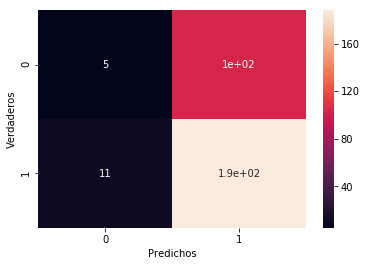

In [104]:
confusion_matrix(y_test, yfit)

sns.heatmap(confusion_matrix(y_test, yfit), annot=True)


plt.ylabel('Verdaderos')
plt.xlabel('Predichos');